In [1]:
import os
from collections import Counter
from tqdm import tqdm

import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from transformers import ViTImageProcessor, ViTForImageClassification

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load dataset using DataLoader
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]
)

dataset = ImageFolder(root="./data/Places2_simp", transform=transform)
class_names = dataset.classes
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [3]:
print("Total images:", len(dataset))

print("Number of classes:", len(os.listdir("./data/Places2_simp")))

images, _ = next(iter(dataloader))
print("Image Shape:", images[0].shape)

Total images: 40000
Number of classes: 40
Image Shape: torch.Size([3, 224, 224])


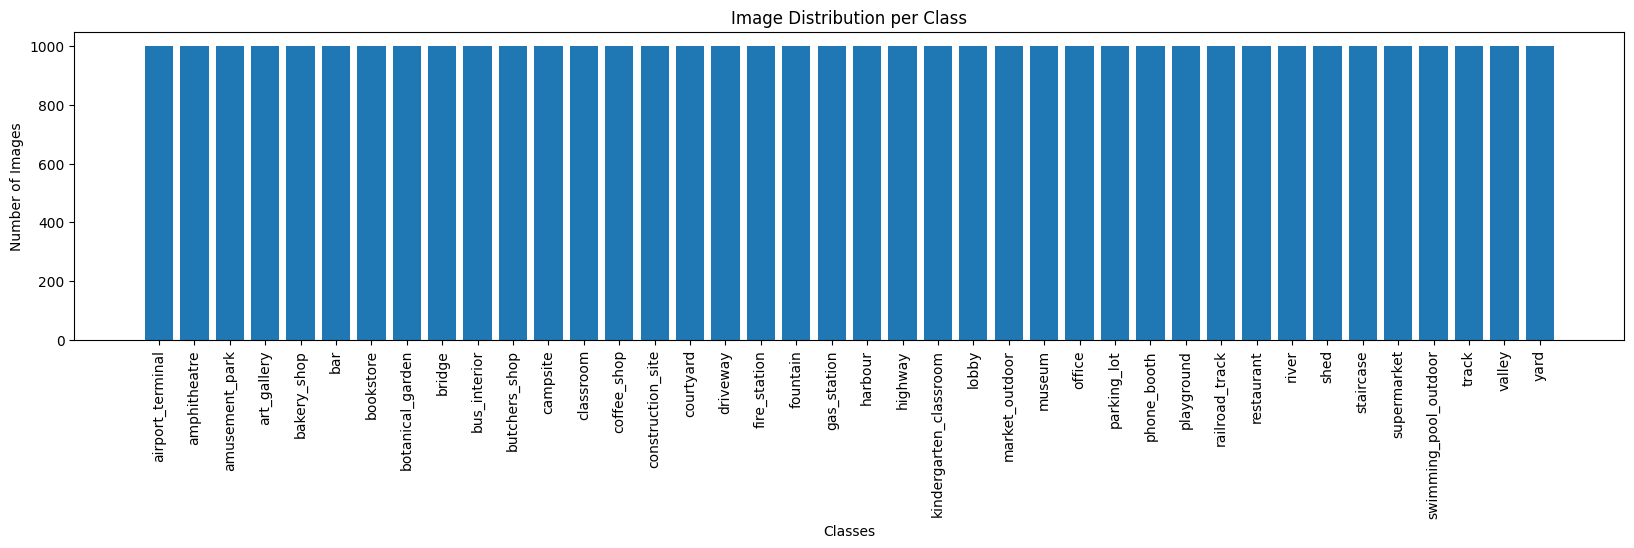

In [4]:
# Images per class or Class distribution Plot
labels = [label for _, label in dataset.samples]
class_counts = Counter(labels)
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

plt.figure(figsize=(20, 4))
plt.bar([idx_to_class[i] for i in class_counts.keys()], class_counts.values())
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.xlabel("Classes")
plt.title("Image Distribution per Class")
plt.show()

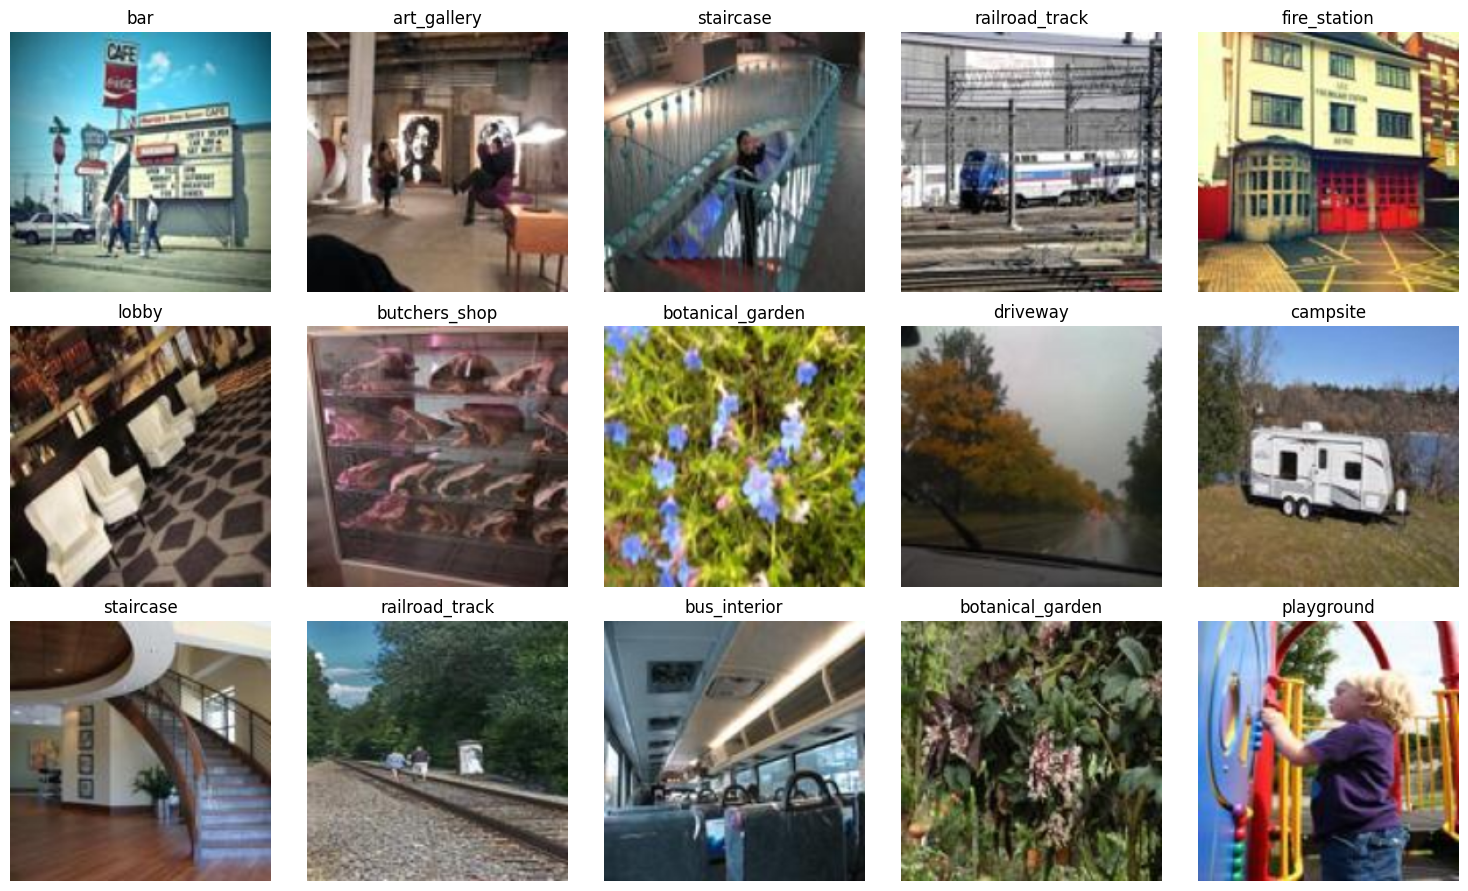

In [5]:
# Plot random images from dataset
def plot_random_images(images, labels):
    num_images = 15
    cols = 5
    rows = 3

    plt.figure(figsize=(cols * 3, rows * 3))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        img = images[i].numpy().transpose((1, 2, 0))
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Get a batch of data
images, labels = next(iter(dataloader))
plot_random_images(images, labels)

In [6]:
# Compute mean and std, useful for normalizing
means = []
stds = []

for img, _ in tqdm(dataset, desc="Computing mean/std"):
    means.append(torch.mean(img, dim=(1, 2)))  # mean per channel
    stds.append(torch.std(img, dim=(1, 2)))  # std per channel

means = torch.stack(means).mean(0)
stds = torch.stack(stds).mean(0)

print(f"Mean per channel(R, G, B): {means}")
print(f"Std per channel(R, G, B): {stds}")

Computing mean/std: 100%|██████████████████████████████████████████████████████████████████| 40000/40000 [00:40<00:00, 999.19it/s]

Mean per channel(R, G, B): tensor([0.4547, 0.4337, 0.4011])
Std per channel(R, G, B): tensor([0.2266, 0.2237, 0.2316])
